In [1]:
import numpy as np
import pandas as pd
from ReliefF import ReliefF

In [2]:
def read_file(path):
#     df = pd.read_csv(path,delimiter = '\t',skiprows = [0,1,2,3])
    df = pd.read_csv(path,delimiter = '\t')
    return df

In [3]:
raw_data = read_file("data_expression_median.txt")

In [4]:
def preprocessing(df):
    # reset column name and drop all row Nan value
    df = df.T
    df = df.drop(['Entrez_Gene_Id'], axis = 0)
    df = df.dropna()
#     df.iloc[:,0:24368] = df.iloc[:,0:24368].astype('float64')
    return df

In [5]:
df = preprocessing(raw_data)

In [6]:
clinical_data = pd.read_csv("clinical_train.csv")

In [9]:
merged = pd.merge(left=df,right=clinical_data, left_on=df.index, right_on='PATIENT_ID')
print(merged.shape)

(1122, 24387)


,0,1,2,3,4,5,6,7,8,9,...,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,CLAUDIN_SUBTYPE,THREEGENE,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,Y_label
0,8.67698,6.07533,5.45393,4.99452,5.83827,6.3975,7.90622,5.25946,5.70238,6.93074,...,0,9,52.79,1,1,1,0,0,0,1
1,9.65359,6.68789,5.45418,5.34601,5.60088,5.24632,8.26726,5.38007,5.52179,6.14169,...,1,6,32.61,4,3,1,1,0,0,1
2,9.03359,5.91088,5.50158,5.24747,6.03072,10.1118,7.95929,5.26202,5.68953,6.52931,...,0,2,66.83,1,2,0,0,0,1,0
3,8.43735,6.09559,5.69352,5.18911,5.73757,5.48009,7.47841,5.43023,5.68629,5.86613,...,1,6,49.50,5,3,1,0,0,0,0
4,8.56997,6.38353,5.40128,5.41652,5.92393,5.67158,8.41058,5.20058,5.77027,7.4031,...,1,8,43.39,2,1,1,0,0,1,0
5,8.8921,5.77369,5.56795,5.33913,5.90222,5.5095,7.77955,5.38372,5.51062,6.88175,...,0,7,50.82,5,0,1,0,0,1,0
6,8.92275,6.46132,5.41096,5.38998,5.53676,7.19694,8.3859,5.39707,5.59435,6.48487,...,0,10,57.79,3,2,0,0,0,0,1
7,9.05397,6.09347,5.25153,5.158,5.85508,9.28632,8.39676,5.26022,5.45831,6.11408,...,0,1,83.68,1,2,0,1,0,0,0
8,8.64369,7.01022,5.47725,5.31312,5.88615,6.90679,7.83995,5.2988,5.59575,6.58553,...,0,5,50.62,1,1,0,1,0,0,0
9,8.54905,5.51715,5.60048,5.28974,5.53294,5.20978,7.31616,5.12024,5.75519,6.8457,...,0,2,60.74,4,1,1,0,0,1,1


In [8]:
X = merged.iloc[:,0:24368].values
y = merged[['Y_label']].values
y = np.squeeze(y)
print(X.shape)
X

(1122, 24368)


array([[8.67697843, 6.07533084, 5.453927669, ..., 7.3046426470000005,
        5.251842663, 5.049591382],
       [9.653589471, 6.687887066, 5.454184983999999, ..., 7.933324369,
        5.450611284, 5.316790428],
       [9.033588668, 5.910884641, 5.50157743, ..., 7.5803362729999995,
        5.235394299, 5.461616662999999],
       ...,
       [9.049296461, 6.85000036, 5.339345754, ..., 7.596214947999999,
        5.405178825, 5.094339035],
       [8.858621675, 6.55045039, 5.566071249, ..., 6.620605418999999,
        5.631661676, 5.350708269],
       [8.41586735, 6.831722291, 5.54139538, ..., 7.43711579,
        5.590515508999999, 5.3292087960000005]], dtype=object)

In [10]:
from ReliefF import ReliefF
fs = ReliefF(n_neighbors=100, n_features_to_keep=10000)
X = fs.fit_transform(X, y)
# X_train = fs.fit_transform(X_train)
# X_test_subset = fs.transform(X_test)
print(X.shape, y.shape)

KeyboardInterrupt: 

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [53]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt

In [54]:
rfc=RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [112]:
rfc1=RandomForestClassifier(class_weight= {0:1 , 1:3} , random_state=0, max_features='auto', n_estimators= 200, max_depth=8, criterion='entropy')

In [113]:
rfc1.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 3},
            criterion='entropy', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [114]:
test = pd.read_csv('clinical_test.csv')

In [115]:
merged = pd.merge(left=df,right=test, left_on=df.index, right_on='PATIENT_ID')

In [116]:
Xtest = merged.iloc[:,0:24368].values
ytest = merged[['Y_label']].values
ytest = np.squeeze(ytest)
Xtest_subset  = fs.transform(Xtest)
print(Xtest.shape , Xtest_subset.shape)

(280, 24368) (280, 10000)


In [117]:
print(ytest.shape)

(280,)


In [118]:
pred=rfc1.predict(Xtest_subset)
print(pred)

[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1
 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1]


In [119]:
print(ytest)

[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1]


In [120]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(ytest,pred))

Accuracy for Random Forest on CV data:  0.7107142857142857


In [121]:
print("F1 for Random Forest on CV data: ",f1_score(ytest,pred))

F1 for Random Forest on CV data:  0.5970149253731343


In [122]:
pred_score = rfc1.predict_proba(Xtest_subset)

In [123]:
pred_score = pred_score[:,1]

In [124]:
def plot_AUC_ROC(y_test, y_score):
    fpr,tpr,threshold = roc_curve(y_test, y_score) 
    roc_auc = auc(fpr,tpr) 

    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

<Figure size 432x288 with 0 Axes>

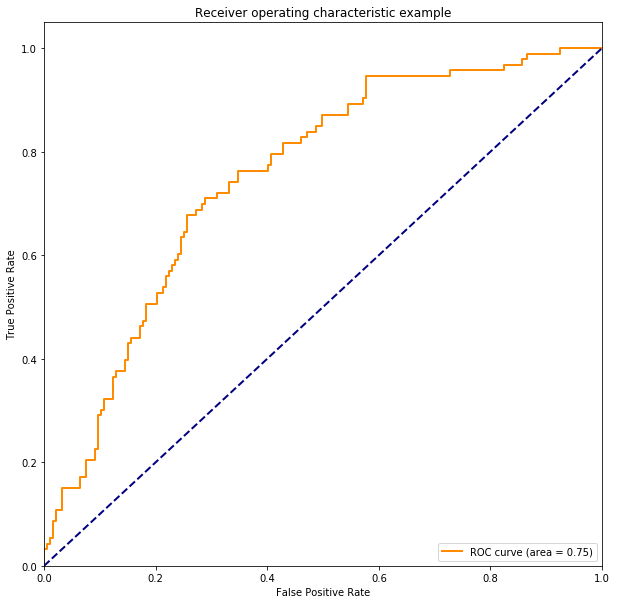

In [125]:
plot_AUC_ROC(ytest, pred_score)